In [2]:
import numpy as np 
import pandas as pd 
import scanpy as sc 
import matplotlib.pyplot as plt

In [3]:
shared_genes = sc.read_h5ad('slide_runs/scRNA_transferred.h5ad').var_names
len(shared_genes)

2062

In [69]:
adata_1der = sc.read_h5ad('slide_runs/slideseq_transferred.h5ad')
adata_1der

AnnData object with n_obs × n_vars = 4558 × 2062
    obs: 'n_counts', 'n_features', 'uniform_density', 'rna_count_based_density', 'celltype_label_tangram', 'celltype_label_tangram_MedFlexCT', 'celltype_label_tangram_LowFlexCT', 'has_tcr', 'has_TRA', 'has_TRB', 'aaSeqCDR3_A', 'aaSeqCDR3_B', 'TRA_clonotype', 'TRB_clonotype', 'final_region', '1DER', '1DER_cell_type', 'cell_type', 'transferred'
    var: 'n_cells', 'sparsity'
    uns: 'final_region_colors', 'overlap_genes', 'training_genes'
    obsm: 'X_spatial', 'spatial', 'tangram_ct_pred'
    layers: 'corrected_count'

In [61]:
corrected_count = pd.read_csv('slideseq_scrna_corrected.csv', index_col=0)
corrected_count.head(3)

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37587,Gm37323,Mrpl15,Lypla1,...,Gm16367,AC163611.1,AC163611.2,AC140365.1,AC124606.2,AC124606.1,AC133095.2,AC133095.1,AC234645.1,AC149090.1
AAAAAAAAAAAATC,0.009958,0.011751,0.012912,0.013736,0.007876,0.016483,0.010476,0.009993,1.044529,0.605461,...,0.008256,0.009024,0.009459,0.014666,0.011292,0.012758,0.015273,0.009777,0.010506,0.633777
AAAAAAAACCAACA,0.015208,0.013072,0.017611,0.018668,0.012294,0.020254,0.013914,0.013839,1.238280,0.591022,...,0.010706,0.013275,0.013540,0.017679,0.015533,0.017541,0.025038,0.012205,0.014572,0.452577
AAAAAAAGCCAACA,0.007829,0.007876,0.009121,0.009834,0.006332,0.011027,0.007126,0.007375,1.228138,0.590343,...,0.006211,0.006921,0.007470,0.009938,0.008776,0.009788,0.012702,0.007651,0.007620,0.470242


In [70]:
adata_1der.X = corrected_count.loc[adata_1der.obs.index, adata_1der.var.index]
adata_1der

AnnData object with n_obs × n_vars = 4558 × 2062
    obs: 'n_counts', 'n_features', 'uniform_density', 'rna_count_based_density', 'celltype_label_tangram', 'celltype_label_tangram_MedFlexCT', 'celltype_label_tangram_LowFlexCT', 'has_tcr', 'has_TRA', 'has_TRB', 'aaSeqCDR3_A', 'aaSeqCDR3_B', 'TRA_clonotype', 'TRB_clonotype', 'final_region', '1DER', '1DER_cell_type', 'cell_type', 'transferred'
    var: 'n_cells', 'sparsity'
    uns: 'final_region_colors', 'overlap_genes', 'training_genes'
    obsm: 'X_spatial', 'spatial', 'tangram_ct_pred'
    layers: 'corrected_count'

In [63]:
scrna = sc.read_h5ad('slide_runs/scRNA_transferred.h5ad')
scrna

AnnData object with n_obs × n_vars = 1082 × 2062
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'leiden_res_1.00', 'leiden_res_1.50', 'leiden_res_2.00', 'transferred'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

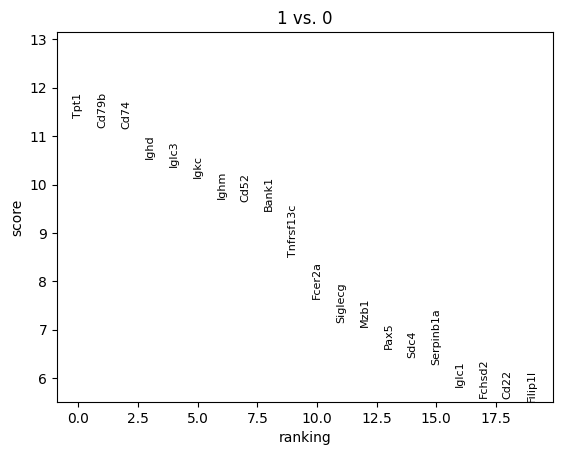

In [64]:
scrna.obs['transferred'] = scrna.obs.transferred.astype(str).astype('category')

sc.tl.rank_genes_groups(
    scrna,
    groupby='transferred',
    groups=['1'],
    reference='0',
    method='wilcoxon',
    use_raw=False
)

sc.pl.rank_genes_groups(scrna, n_genes=20, sharey=False)



In [65]:
scrna_degs = sc.get.rank_genes_groups_df(scrna, group='1')
scrna_degs

,names,scores,logfoldchanges,pvals,pvals_adj
0,Tpt1,11.386145,0.390605,4.902056e-30,1.091025e-27
1,Cd79b,11.173730,5.014347,5.482918e-29,9.421480e-27
2,Cd74,11.141768,4.092613,7.854464e-29,1.245839e-26
3,Ighd,10.526499,5.531790,6.521543e-26,6.723711e-24
4,Iglc3,10.373014,6.196299,3.289814e-25,3.083453e-23
...,...,...,...,...,...
2057,Tnfrsf4,-12.261105,-6.499640,1.464885e-34,6.041186e-32
2058,Sh2d1a,-12.371973,-3.713757,3.706029e-35,1.910458e-32
2059,Ikzf2,-12.412259,-5.565517,2.242360e-35,1.541248e-32
2060,Tnfrsf18,-12.499489,-5.338116,7.513306e-36,7.746218e-33


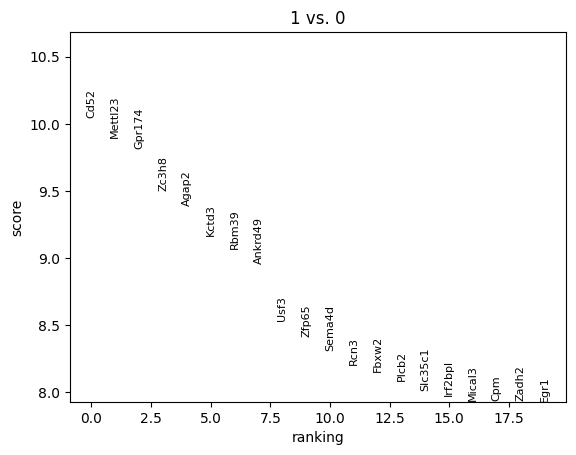

In [71]:
adata_1der.obs['transferred'] = adata_1der.obs['transferred'].astype(str).map({'True': '1', 'False': '0'})
adata_1der.obs['transferred'] = adata_1der.obs.transferred.astype(str).astype('category')

sc.tl.rank_genes_groups(
    adata_1der,
    groupby='transferred',
    groups=['1'],
    reference='0',
    method='wilcoxon',
    use_raw=False
)

sc.pl.rank_genes_groups(adata_1der, n_genes=20, sharey=False)



In [72]:
slideseq_degs = sc.get.rank_genes_groups_df(adata_1der, group='1')
slideseq_degs

,names,scores,logfoldchanges,pvals,pvals_adj
0,Cd52,10.047924,0.969511,9.382283e-24,2.202828e-21
1,Mettl23,9.896666,0.109201,4.303861e-23,6.338972e-21
2,Gpr174,9.816120,0.147505,9.596622e-23,1.164014e-20
3,Zc3h8,9.500207,0.138372,2.094745e-21,1.308898e-19
4,Agap2,9.390518,0.133053,5.970560e-21,3.419804e-19
...,...,...,...,...,...
2057,Wtip,-10.216189,-0.208090,1.678086e-24,6.920425e-22
2058,Stap2,-10.306628,-0.267263,6.576848e-25,3.390365e-22
2059,Fabp5,-10.340471,-0.895120,4.622572e-25,3.177248e-22
2060,Arhgef9,-10.346601,-0.219028,4.336065e-25,3.177248e-22


In [73]:
slideseq_degs[slideseq_degs['names'] == 'Prdm1']


,names,scores,logfoldchanges,pvals,pvals_adj
1935,Prdm1,-8.042048,-0.138772,8.834934e-16,1.292031e-14


In [74]:
scrna_degs[scrna_degs['names'] == 'Prdm1']


,names,scores,logfoldchanges,pvals,pvals_adj
1654,Prdm1,-3.277108,-27.590008,0.001049,0.004849


In [75]:
slideseq_degs = slideseq_degs[slideseq_degs['pvals_adj'] < 0.05]
slideseq_degs.set_index('names', inplace=True)

In [76]:
scrna_degs = scrna_degs[scrna_degs['pvals_adj'] < 0.05].set_index('names')
scrna_degs

,scores,logfoldchanges,pvals,pvals_adj
names,,,,
Tpt1,11.386145,0.390605,4.902056e-30,1.091025e-27
Cd79b,11.173730,5.014347,5.482918e-29,9.421480e-27
Cd74,11.141768,4.092613,7.854464e-29,1.245839e-26
Ighd,10.526499,5.531790,6.521543e-26,6.723711e-24
Iglc3,10.373014,6.196299,3.289814e-25,3.083453e-23
...,...,...,...,...
Tnfrsf4,-12.261105,-6.499640,1.464885e-34,6.041186e-32
Sh2d1a,-12.371973,-3.713757,3.706029e-35,1.910458e-32
Ikzf2,-12.412259,-5.565517,2.242360e-35,1.541248e-32


In [77]:
slideseq_degs = slideseq_degs[abs(slideseq_degs['logfoldchanges']) > 0.1 ]
slideseq_degs.sort_values('logfoldchanges', ascending=False)

,scores,logfoldchanges,pvals,pvals_adj
names,,,,
Cd74,2.208261,4.861989,2.722606e-02,4.065179e-02
Igkc,2.453385,3.909508,1.415189e-02,2.212372e-02
Tpt1,6.289053,1.918553,3.194084e-10,1.538832e-09
Cd79b,4.003150,1.356629,6.250472e-05,1.407038e-04
Cd52,10.047924,0.969511,9.382283e-24,2.202828e-21
...,...,...,...,...
Vim,-8.186993,-0.666240,2.678344e-16,4.526840e-15
Cst3,-6.526234,-0.718009,6.744392e-11,3.621598e-10
Ccl5,-6.880938,-0.798660,5.945979e-12,3.648991e-11


In [78]:
slideseq_degs.loc['Prdm1']

scores           -8.042048e+00
logfoldchanges   -1.387722e-01
pvals             8.834934e-16
pvals_adj         1.292031e-14
Name: Prdm1, dtype: float64

In [79]:
scrna_degs = scrna_degs[abs(scrna_degs['logfoldchanges']) > 20]
scrna_degs.sort_values('logfoldchanges', ascending=False)

,scores,logfoldchanges,pvals,pvals_adj
names,,,,
Paqr4,-2.428116,-26.598843,1.517748e-02,4.770725e-02
Pcbp4,-2.920532,-26.899340,3.494349e-03,1.341778e-02
Tnnt1,-2.988451,-26.980721,2.803956e-03,1.114019e-02
Slc5a3,-2.750733,-27.116459,5.946206e-03,2.110340e-02
Rad54l,-3.497846,-27.152124,4.690321e-04,2.442283e-03
Cenpu,-3.701604,-27.194731,2.142409e-04,1.233980e-03
Cd40lg,-3.243148,-27.273991,1.182166e-03,5.381075e-03
Tnfrsf25,-2.496036,-27.386116,1.255900e-02,4.071801e-02
Chst2,-3.718584,-27.463566,2.003429e-04,1.160413e-03


In [80]:
degs = list(set(scrna_degs.index) & set(adata_1der.var_names))
len(degs)

24

In [81]:
# degs = list(set(slideseq_degs.index) & set(adata_1der.var_names))
# len(degs)

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression

X = scrna.to_df()[degs]
X_scaled = StandardScaler().fit_transform(X)

y = scrna.obs['transferred'].astype(int).values
# lr_model = Lasso(alpha=0.1)
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
lr_model.coef_.shape, lr_model.intercept_

((24,), 0.09426987060998131)

In [83]:
X = adata_1der.to_df()[degs]
X_scaled = StandardScaler().fit_transform(X)

In [84]:
transferred = adata_1der[adata_1der.obs['transferred'] == '1']
not_transferred = adata_1der[adata_1der.obs['transferred'] == '0']

transferred_mask = adata_1der.obs['transferred'] == '1'
not_transferred_mask = adata_1der.obs['transferred'] == '0'

transferred_X = X_scaled[transferred_mask.values]
not_transferred_X = X_scaled[not_transferred_mask.values]

transferred_X.shape, not_transferred_X.shape

((728, 24), (3830, 24))

In [87]:
transferred_pred = transferred_X @ lr_model.coef_ + lr_model.intercept_
not_transferred_pred = not_transferred_X @ lr_model.coef_ + lr_model.intercept_

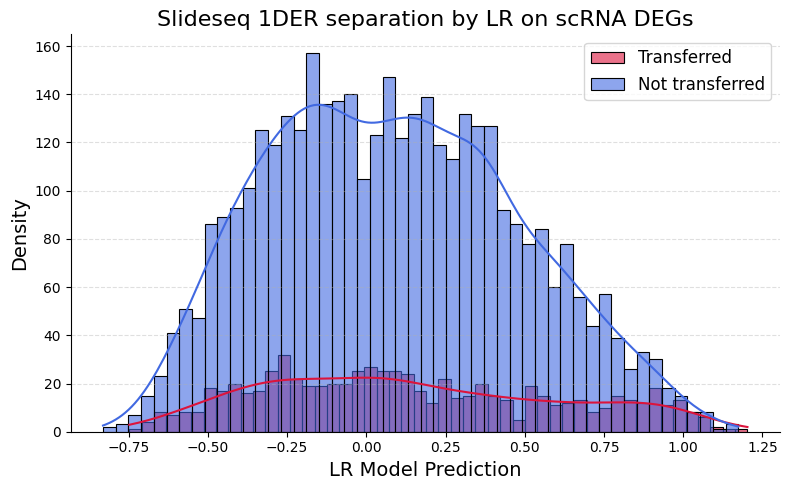

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(transferred_pred, bins=50, color='crimson', label='Transferred', kde=True, stat='count', alpha=0.6)
sns.histplot(not_transferred_pred, bins=50, color='royalblue', label='Not transferred', kde=True, stat='count', alpha=0.6)

plt.xlabel('LR Model Prediction', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Slideseq 1DER separation by LR on scRNA DEGs', fontsize=16)
plt.legend(fontsize=12, frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()

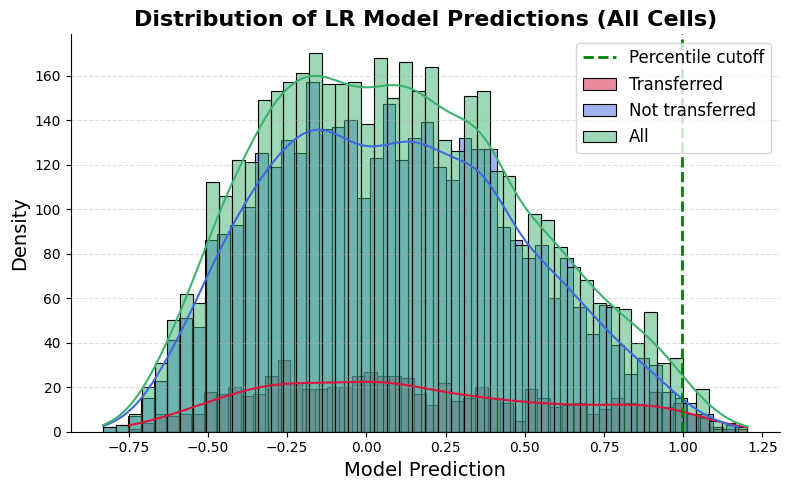

In [91]:
unresolved = np.concatenate([transferred_pred, not_transferred_pred])
percentile_cutoff = np.percentile(unresolved, 99)

plt.figure(figsize=(8, 5))
# Plot the previous two distributions behind the new one
sns.histplot(transferred_pred, bins=50, color='crimson', label='Transferred', kde=True, stat='count', alpha=0.5)
sns.histplot(not_transferred_pred, bins=50, color='royalblue', label='Not transferred', kde=True, stat='count', alpha=0.5)
sns.histplot(unresolved, bins=50, color='mediumseagreen', label='All', kde=True, stat='count', alpha=0.5)

plt.axvline(percentile_cutoff, color='green', linestyle='--', linewidth=2, label='Percentile cutoff')

plt.xlabel('Model Prediction', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of LR Model Predictions (All Cells)', fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(fontsize=12, frameon=True)
sns.despine()
plt.tight_layout()
plt.show()

In [93]:
visium = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1a_visiumHD.h5ad')
visium

AnnData object with n_obs × n_vars = 22324 × 2116
    obs: 'sample', 'cell_type', 'secondary_annot', 'cell_type_int'
    uns: 'cell_thresholds', 'cell_type_colors', 'neighbors', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_features', 'spatial_maps', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [94]:
visium = visium[:, [x for x in degs if x in visium.var_names]]
visium

View of AnnData object with n_obs × n_vars = 22324 × 24
    obs: 'sample', 'cell_type', 'secondary_annot', 'cell_type_int'
    uns: 'cell_thresholds', 'cell_type_colors', 'neighbors', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_features', 'spatial_maps', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

In [97]:
visium.obs_names

Index(['276144', '260035', '177075', '202871', '278815', '191995', '280618',
       '182396', '204219', '180869',
       ...
       '210427', '255960', '277947', '200985', '177231', '261095', '191458',
       '175646', '296138', '291389'],
      dtype='object', name='object_id', length=22324)

In [99]:
corrected_count.index

Index([247819, 200373, 190000, 176888, 253162, 271801, 207673, 292463, 295044,
       247190,
       ...
       176890, 178338, 304058, 263631, 245782, 257290, 248680, 301169, 181465,
       290912],
      dtype='int64', name='object_id', length=89296)

In [ ]:
corrected_count = pd.read_csv('visium_scrna_corrected.csv', index_col=0)

In [102]:
visium.obs.index = visium.obs.index.astype(str)
corrected_count.index = corrected_count.index.astype(str)

In [104]:
visium.X = corrected_count.loc[visium.obs.index, visium.var_names]


In [105]:
visium = visium[visium.obs.cell_type.isin(['Tfh', 'Treg', 'Th2'])]
visium.obs.cell_type.value_counts()

cell_type
Treg    410
Tfh     217
Th2     122
Name: count, dtype: int64

In [106]:
X = visium.to_df()[degs]
X_scaled = StandardScaler().fit_transform(X)

In [107]:
pred = X_scaled @ lr_model.coef_ + lr_model.intercept_
visium.obs['transferred'] = np.where(pred > np.percentile(pred, 99), 1, 0)
visium.obs['transferred'].value_counts()

/tmp/ipykernel_90377/3692523053.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  visium.obs['transferred'] = np.where(pred > np.percentile(pred, 99), 1, 0)


transferred
0    741
1      8
Name: count, dtype: int64

In [108]:
visium[visium.obs['transferred'] == 1].obs.cell_type.value_counts()

cell_type
Tfh     6
Th2     1
Treg    1
Name: count, dtype: int64

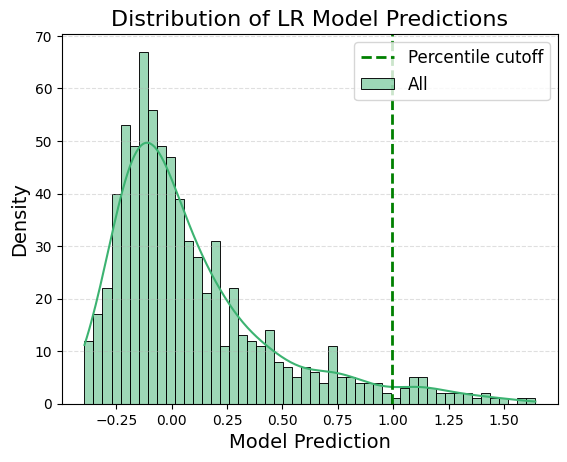

In [109]:
sns.histplot(pred, bins=50, color='mediumseagreen', label='All', kde=True, stat='count', alpha=0.5)
plt.axvline(percentile_cutoff, color='green', linestyle='--', linewidth=2, label='Percentile cutoff')
plt.xlabel('Model Prediction', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of LR Model Predictions', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(fontsize=12, frameon=True)

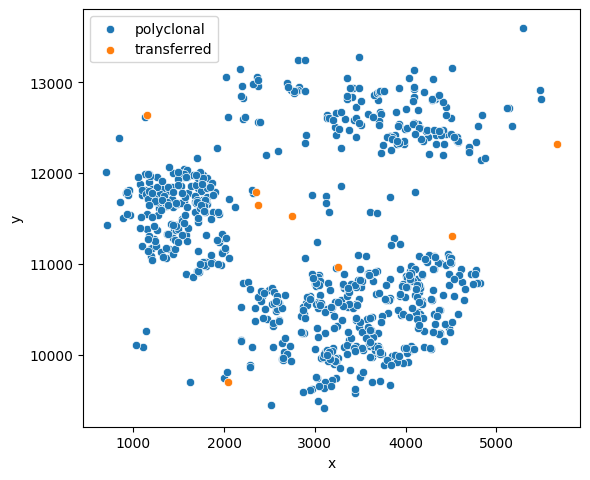

In [110]:
visium.obs['x'] = visium.obsm['spatial'][:, 0]
visium.obs['y'] = visium.obsm['spatial'][:, 1]

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(
    data = visium.obs[visium.obs.transferred == 0],
    x = 'x', y = 'y',
    label = 'polyclonal',
    ax=ax
)
sns.scatterplot(
    data = visium.obs[visium.obs.transferred == 1],
    x = 'x', y = 'y',
    label = 'transferred'
)
plt.tight_layout()
plt.gca().set_aspect('equal')
plt.show()

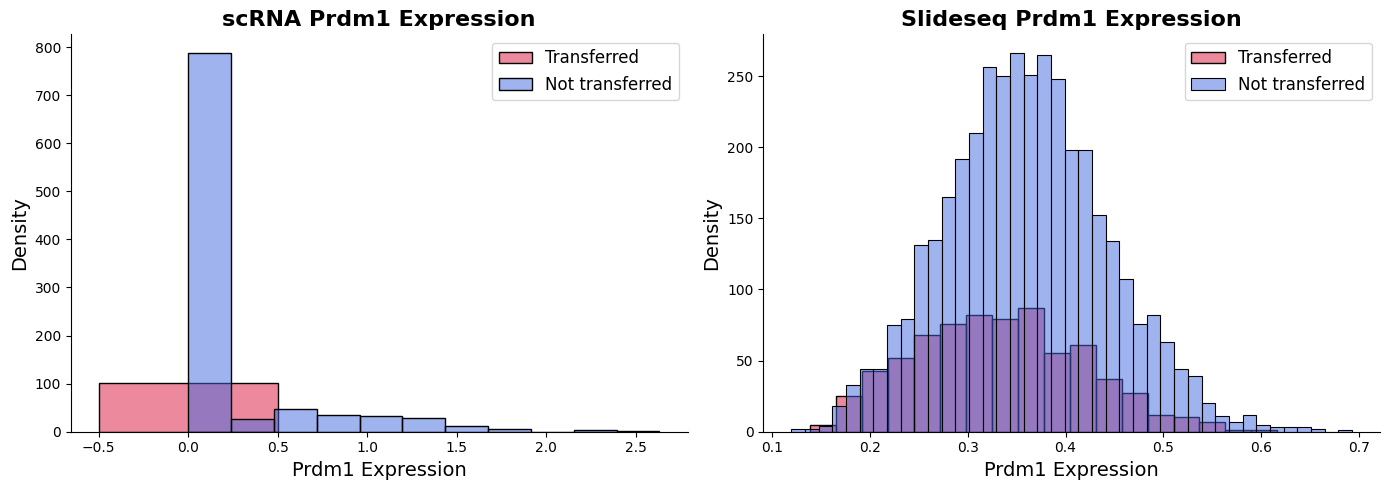

In [28]:
# Get Prdm1 expression for all cells from adata_1der (Slideseq)
prdm1_expr_slideseq = adata_1der.to_df(layer='counts')['Prdm1']
transferred_mask_slideseq = adata_1der.obs['transferred'] == '1'
not_transferred_mask_slideseq = adata_1der.obs['transferred'] == '0'

# Get Prdm1 expression for all cells from adata_scrna (scRNA)
prdm1_expr_scrna = scrna.to_df(layer='counts')['Prdm1']
transferred_mask_scrna = scrna.obs['transferred'] == '1'
not_transferred_mask_scrna = scrna.obs['transferred'] == '0'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # removed sharey

# scRNA on the left
sns.histplot(
    prdm1_expr_scrna[transferred_mask_scrna], 
    label='Transferred', color='crimson', fill=True, alpha=0.5, ax=axes[0], stat='count'
)
sns.histplot(
    prdm1_expr_scrna[not_transferred_mask_scrna], 
    label='Not transferred', color='royalblue', fill=True, alpha=0.5, ax=axes[0], stat='count'
)
axes[0].set_xlabel('Prdm1 Expression', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)
axes[0].set_title('scRNA Prdm1 Expression', fontsize=16, weight='bold')
axes[0].legend(fontsize=12, frameon=True)
sns.despine(ax=axes[0])

# Slideseq on the right
sns.histplot(
    prdm1_expr_slideseq[transferred_mask_slideseq], 
    label='Transferred', color='crimson', fill=True, alpha=0.5, ax=axes[1], stat='count'
)
sns.histplot(
    prdm1_expr_slideseq[not_transferred_mask_slideseq], 
    label='Not transferred', color='royalblue', fill=True, alpha=0.5, ax=axes[1], stat='count'
)
axes[1].set_xlabel('Prdm1 Expression', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].set_title('Slideseq Prdm1 Expression', fontsize=16, weight='bold')
axes[1].legend(fontsize=12, frameon=True)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()
